# Interpolation

## Polynomial Interpolation

Given $ d+1 $ points $ (t_0, \ y_0), (t_1, \ y_1), \ \cdots \ , (t_d, \ y_d) $. Polynomial interpolation is a polynomial of rank $ d $ that goes through all $ d + 1 $ points 

$ p(t) = c_0 + c_1 \ t + \cdots + c_d \ t^d  \ \ \ \ | \ \ \ \ p(t_k) = y_k , \ \ \ \ k = 0, \cdots, d $

or

$ p(t_0) = y_0 $

$ p(t_1) = y_1 $

$ \vdots $

$ p(t_d) = y_d $

We can write the interpolation function at the various points as

$ c_0 + c_1 t_0 + \cdots + c_d t_0^d = y_0 $

$ c_0 + c_1 t_1 + \cdots + c_d t_1^d = y_1 $

$ \ \ \ \ \ \ \vdots $

$ c_0 + c_1 t_d + \cdots + c_d t_d^d = y_d $

This can be written in matrix form $ \textbf{Ac} = \textbf{y} $
 
$
\begin{bmatrix}
\ 1 & t_0 & \cdots & t_0^d \ \\
\ 1 & t_1 & \cdots & t_1^d \ \\
\vdots & \vdots & \ddots & \vdots \\
\ 1 & t_d & \cdots & t_d^d \
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
c_n
\end{bmatrix}
    =
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_d
\end{bmatrix}
$

The matrix $ \textbf{A} $ is called the Vandermonde matrix.

The Vandermonde matrix has a non-zero determinant given by

$
det(A) = \displaystyle \prod_{0\le i < j \le d}^{} (t_j - t_i)
$

This means the matrix $ A $ is invertible and there exists a unique polynomial $ p(t) $ of degree (at most) d such that 

$ p(t_k) = y_k , \ \ \ \ k = 0, \cdots, d $

or

$ p(t_0) = y_0 $

$ p(t_1) = y_1 $

$ \vdots $

$ p(t_d) = y_d $

### Example

Interpolate through the following points using polynomial interpolation,

$ (0, -1), (1, -1), (2, 1), (3, -1) $

We have 4 points, which means we will need a polynomial of degree 3 so that it can pass through all 4 points

[]

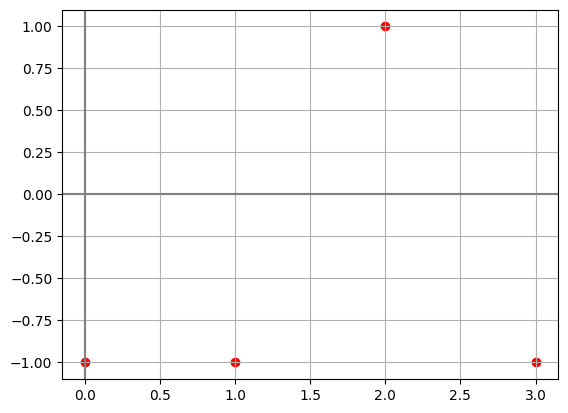

In [6]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [-1, -1, 1, -1]

plt.scatter(x, y, c="r")

plt.grid()

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

plt.plot()

So we need a cubic to fit the four points

$ p(t) = c_0 + c_1 t + c_2 t + c_3 t^3 $

Evaluate the polynomial at the four points:-

$ p(0) = c_0 = -1 \ \ \ \ \Rightarrow c_0 = -1 $

$ p(1) = c_0 + c_1 \times 1 + c_2 \times 1^2 + c_3 \times 1^3 = -1 \ \ \ \Rightarrow c_0 + c_1 + c_2 + c_3 = -1 $

$ p(1) = c_0 + c_1 \times 2 + c_2 \times 2^2 + c_3 \times 2^3 = 1 \ \ \ \Rightarrow c_0 + 2 c_1 + 4 c_2 + 8 c_3 = 1 $

$ p(1) = c_0 + c_1 \times 3 + c_2 \times 3^2 + c_3 \times 3^3 = -1 \ \ \ \Rightarrow c_0 + 3 c_1 + 9 c_2 + 27 c_3 = -1 $

In matrix form $ \textbf{Ac = y} $

  $
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  1 & 1 & 1 & 1 \\
  1 & 2 & 4 & 8 \\
  1 & 3 & 9 & 27
  \end{bmatrix}
  \begin{bmatrix}
  c_0 \\
  c_1 \\
  c_2 \\
  c_3
  \end{bmatrix}
      =
  \begin{bmatrix}
  -1 \\
  -1 \\
  1 \\
  -1
  \end{bmatrix}
  $

 $ \textbf{c} = \textbf{A}^{-1}\textbf{y} $

In [7]:
import numpy as np
import scipy.linalg as la

A = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [1, 2, 4, 8], [1, 3, 9, 27]])

y = np.array([-1, -1, 1, -1])

c = la.inv(A) @ y 

c

array([-1., -3.,  4., -1.])

$
\implies 
c=
\begin{bmatrix}
-1 \\
-3 \\
4 \\
-1
\end{bmatrix}
$

$
\implies
p(t) = -1 - 3t + 4t^2 - t^3
$

Plot to ensure polynomial goes through the data points


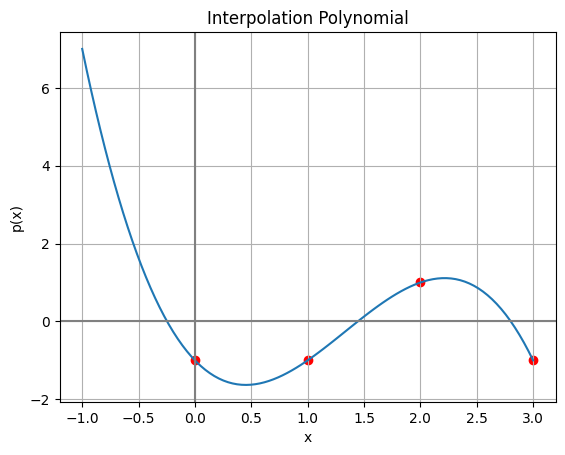

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: -1-3*x + 4 * x**2 - x**3

x = np.linspace(-1, 3, 100)

plt.plot(x, f(x))

x = [0, 1, 2, 3]
y = [-1, -1, 1, -1]

plt.scatter(x, y, color="red")

plt.grid()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

plt.title("Interpolation Polynomial")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

## Cubic Spline Interpolation

Consider $ n+1 $ points $ (x_0, \ y_0), (x_1, \ y_1), \ \cdots \ , (x_n, \ y_n) $. A cubic spline is a function $ p(x) $ defined piecewise by $ N $ cubic polynomials $ p_{1}(x), \ p_2(x), \ \cdots, \ p_n(x) $

- Each polynomial is cubic of the form 
  
  $ p_k(x) = a_k x^3 + b_{k} x^2 + c_{k} x + d_k $ 
  
  such that $ p_k(x), \ p'_k(x) $ and $ p''(x) $ are continuous functions. 
  
  Each polynomial $ p_k(x) $ is defined by four coefficients $ a_k, \ b_k, \ c_k, \ d_k $, therefore, we require $ 4 \times n $ equations to specify the $ 4n $ unknowns.

  $ p_1(x) = a_1 x^3 + b_1 x^2 + c_1 x + d_1 $

  $ p_2(x) = a_2 x^3 + b_2 x^2 + c_2 x + d_1 $

  $ \cdots $

  $ p_n(x) = a_n x^3 + b_n x^2 + c_n x + d_n $

  Each polynomial passes through two points and two adjacent polynomials connect at a point

  > $ p_1(x_0) = a_1 x_0^3 + b_1 x_0^2 + c_1 x_0 + d_1 = y_0 $
  >
  > $ p_1(x_1) = a_1 x_1^3 + b_1 x_1^2 + c_1 x_1 + d_1 = y_1 $
  >
  > $ p_2(x_1) = a_2 x_1^3 + b_2 x_1^2 + c_2 x_1 + d_2 = y_1 $
  >
  > $ p_2(x_2) = a_2 x_2^3 + b_2 x_2^2 + c_2 x_2 + d_2 = y_2 $
  >
  > $ \cdots $
  >
  > $ p_n(x_{n-1}) = a_n x_{n-1}^3 + b_n x_{n-1}^2 + c_n x_{n-1} + d_n = y_{n-1} $
  >
  > $ p_n(x_n) = a_n x_n^3 + b_n x_N^2 + c_n x_n + d_n = y_n $

- The derivative of a cubic polynomial is

  $ p_k'(x) = 3 a_k x^2 + 2 b_k x + c_k $

  The first derivatives of these polynomials must match at connecting points
  
  $ p'_1(x_1) = p'_2(x_1) $

  $ p'_2(x_2) = p'_3(x_2) $

  $ \cdots $

  $ p'_{N-1}(x_{N-1}) = p'_N(x_{N-1}) $

  Expanding the above formulas

  > $ 3 a_1 x_1^2 + 2 b_1 x_1 + c_1 - 3 a_2 x_1^2 - 2 b_2 x_1 - c_2 = 0 $
  >
  > $ 3 a_2 x_2^2 + 2 b_2 x_2 + c_2 - 3 a_3 x_2^2 - 2 b_3 x_2 - c_3 = 0 $
  >
  > $ \ \ \ \vdots \ \ \ \vdots \ \ \ \ \vdots $
  >
  > $ 3 a_{n-1} x_{n-1}^2 + 2 b_{n-1} x_{n-1} + c_2 - 3 a_n x_{n-1}^2 - 2 b_n x_{n-1} - c_n = 0 $

- The second derivative of a cubic polynomial is

  $ p_k''(x) = 6 a_k x + 2 b_k $

  The second derivative of the cubic polynomials also have to have matching values at connecting points

  $ p''_1(x_1) = p''_2(x_1) $

  $ p''_2(x_2) = p''_3(x_2) $

  $ \cdots $

  $ p''_{n-1}(x_{n-1}) = p''_n(x_{n-1}) $

  The above requirements can be written as

  > $ 6 a_1 x_1 + 2 b_1 - 6 a_2 x_1 - 2 b_2 = 0 $
  >
  > $ 6 a_2 x_2 + 2 b_2 - 6 a_3 x_2 - 2 b_3 = 0 $
  >
  > $ \cdots $
  >
  > $ 6 a_{n-1} x_n + 2 b_{n-1} - 6 a_n x_{n-1} - 2 b_n = 0 $

- Finally, the second derivatives of the polynomials at the first and last point must be zero
  
  $ p''_1(x_0) = 0 $

  $ p''_n(x_n) = 0 $

  These are expanded to become

  > $ 6 a_1 x_0 + 2 b_1 = 0 $
  >
  > $ 6 a_n x_n + 2 b_n = 0 $

- We can combine all the above linear equations in a matrix formula
  
  To evaluate the polynomial coefficients $ a_1, b_1, c_1, d_1, a_2, b_2, \cdots , a_n, b_n, c_n, d_n $, write the above rules as a linear system and solve for the inverse matrix
  
  $
  \begin{bmatrix}
  x_0^3 & x_0^2 & x_0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  x_1^3 & x_1^2 & x_1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & x_1^3 & x_1^2 & x_1 & 1 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & x_2^3 & x_2^2 & x_2 & 1 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & x_2^3 & x_2^2 & x_2 & 1 & 0 & \cdots \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & x_3^3 & x_3^2 & x_3 & 1 & 0 & \cdots \\
  \vdots \\
  3 x_1^2 & 2 x_1 & x_1 & 0 & -3 x_1^2 & -2 x_1 & -x_1 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & 3 x_2^2 & 2 x_2 & x_2 & 0 & -3 x_3^2 & -2 x_3 & -x_3 & 0 & 0 & \cdots \\
  \vdots \\
  6 x_1 & 2 & 0 & 0 & -6 x_1 & -2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & 6 x_2 & 2 & 0 & 0 & -6 x_2 & -2 & 0 & 0 & 0 & \cdots \\
  \vdots \\
  6 x_0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 6 x_n & 2 & 0 & 0 \\
  \end{bmatrix}
  \begin{bmatrix}
  a_1 \\
  b_1 \\
  c_1 \\
  d_1 \\
  a_2 \\
  b_2 \\
  c_2 \\
  d_2 \\
  a_3 \\
  b_3 \\
  c_3 \\
  \vdots \\
  a_n \\
  b_n \\
  c_n \\
  d_n \\
  \end{bmatrix}
      =
  \begin{bmatrix}
  y_0 \\ 
  y_1 \\
  y_1 \\
  y_2 \\
  y_2 \\
  y_3 \\
  y_3 \\
  y_4 \\
  y_4 \\
  y_5 \\
  y_5 \\
  y_6 \\
  y_6 \\
  \vdots \\
  y_n \\
  y_n
  \end{bmatrix}
  $

### Example

Find the cubic interpolation polynomials that go through the three points $ (1, 1), \ (2, 5), \ (3, 4) $

**Solution:**

Plot the points

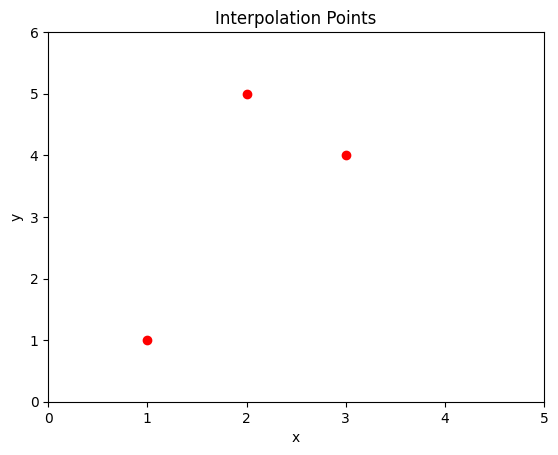

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([1, 5, 4])

plt.scatter(x, y, c='r')

ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 6])

plt.title("Interpolation Points")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

- Since we have 3 points, we will need 2 cubic polynomials.

  $ p_1(x) = a_1 x^3 + b_1 x^2 + c_1 x + d_1 $

  $ p_2(x) = a_2 x^3 + b_2 x^2 + c_2 x + d_2 $

  Evaluate these polynomials at the points

  > $ p_1(1) = a_1 \ 1^3 + b_1 \ 1^2 + c_1 + d_1 = 1 \ \ \ \ \ \ \ \ \ \Rightarrow \ \ a_1 + b_1 + c_1 + d_1 = 1 $
  >
  > $ p_1(2) = a_1 \ 2^3 + b_1 \ 2^2 + c_1 \ 2 + d_1 = 1 \ \ \ \ \ \ \Rightarrow \ \ 8 a_1 + 4 b_1 + 2 c_1 + d_1 = 5 $
  >
  > $ p_2(2) = a_2 \ 2^3 + b_2 \ 2^2 + c_2 \ 2 + d_2 = 1 \ \ \ \ \ \ \Rightarrow \ \ 8 a_2 + 4 b_2 + 2 c_2 + d_2 = 5 $
  >
  > $ p_2(3) = a_2 \ 3^3 + b_2 \ 3^2 + c_2 \ 3 + d_2 = 4 \ \ \ \ \ \ \Rightarrow \ \ 27 a_2 + 9 b_2 + 3 c_2 + d_2 = 5 $

- Evaluate their first derivatives

  $ p'_1(x) = 3 a_1 x^2 + 2 b_1 x + c_1 $

  $ p'_2(x) = 3 a_2 x^2 + 2 b_2 x + c_2 $

  These must be equal at connecting points

  $ \implies p'_1(2) = p'_2(2) \ \ \ \ \ \Rightarrow 12 a_1 + 4 b_1 + c_1 - 12 a_2 - 4 b_2 - c_2 = 0 $

- Evaluate their second derivative

  $ p''_1(x) = 6 a_1 x + 2 b_1 $

  $ p''_2(x) = 6 a_2 x + 2 b_2 $

  These must be equal at connecting points

  $ \implies p''_1(2) = p''_2(2) \ \ \ \ \ \Rightarrow 12 a_1 + 2 b_1 - 12 a_2 - 2 b_2 = 0 $

- The second derivatives are zero at the start and end points
  
  $ p''_1(1) = 6 a_1 (1) + 2 b_1 = 0 \ \ \ \ \ \Rightarrow 6 a_1 + 2 b_1 = 0 $

  $ p''_2(3) = 6 a_2 (3) + 2 b_2 = 0 \ \ \ \ \ \Rightarrow 18 a_2 + 2 b_2 = 0 $

- Combine all of these into a linear system
  
  $
  \begin{bmatrix}
  1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
  8 & 4 & 2 & 1 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 8 & 4 & 2 & 1 \\
  0 & 0 & 0 & 0 & 27 & 9 & 3 & 1 \\
  12 & 4 & 1 & 0 & -12 & -4 & -1 & 0 \\
  12 & 2 & 0 & 0 & -12 & -2 & 0 & 0 \\
  6 & 2 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 18 & 2 & 0 & 0 
  \end{bmatrix}
  \begin{bmatrix}
  a_1 \\
  b_1 \\
  c_1 \\
  d_1 \\
  a_2 \\
  b_2 \\
  c_2 \\
  d_2 \\
  \end{bmatrix}
      =
  \begin{bmatrix}
  1 \\ 
  5 \\
  5 \\
  4 \\
  0 \\
  0 \\
  0 \\
  0 \\
  \end{bmatrix}
  $

  Solve for the coefficients

In [20]:
import numpy as np 
import scipy.linalg as linalg

A = np.array([[1,1,1,1,0,0,0,0], 
              [8,4,2,1,0,0,0,0], 
              [0,0,0,0,8,4,2,1], 
              [0,0,0,0,27,9,3,1],
              [12,4,1,0,-12,-4,-1,0],
              [12,2,0,0,-12,-2,0,0],
              [6,2,0,0,0,0,0,0],
              [0,0,0,0,18,2,0,0]])

AInv = np.round(linalg.inv(A), decimals=2)

r = np.array([1,5,5,4,0,0,0,0])

coef = AInv @ r.T

coef

array([ -1.25,   3.75,   1.5 ,  -3.  ,   1.25, -11.25,  31.5 , -23.  ])

Therefore the coefficients are

$
a_1 = -1.25 \\
b_1 = 3.75 \\
c_1 = 1.50 \\
d_1 = -3.00 \\
a_2 = 1.25 \\
b_2 = -11.25 \\
c_2 = 31.50 \\
d_2 = -23.00
$

And the cubic interpolating polynomials can be written as 

$ p_1(x) = -1.25 \ x^3 + 3.75 \ x^2 + 1.50 \ x - 3.00 $

$ p_2(x) = 1.25 \ x^3 - 11.25 \ x^2 + 31.50 \ x - 23.00 $

Let's plot these with the data points

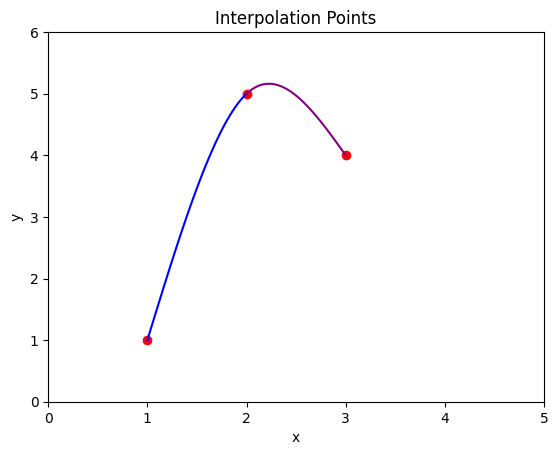

In [23]:
import numpy as np
import matplotlib.pyplot as plt

p1 = lambda x: -1.25*x**3 + 3.75*x**2 + 1.50*x - 3.00
p2 = lambda x: 1.25*x**3 - 11.25*x**2 + 31.50*x - 23.00

x = np.array([1, 2, 3])
y = np.array([1, 5, 4])

plt.scatter(x, y, c='r')

x1 = np.linspace(1, 2, 50)
x2 = np.linspace(2, 3, 50)

plt.plot(x1, p1(x1), c='b')
plt.plot(x2, p2(x2), c='purple')

ax = plt.gca()
ax.set_xlim([0, 5])
ax.set_ylim([0, 6])

plt.title("Interpolation Points")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Interpolation with SciPy

